In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('ATM.csv', names=['x','y'])
df

,x,y
0,10.94231,76.93460
1,10.94627,76.93156
2,10.94891,76.93509
3,10.94413,76.93978
4,10.94053,76.93599
5,10.94627,76.93156
6,10.94573,76.92929
7,10.94450,76.93529
8,10.94336,76.93378
9,10.94929,76.92915


In [3]:
X = df.values.tolist()
X = StandardScaler().fit_transform(X)

In [4]:
maxi = [0,0,0]
for eps in np.arange(0.01, 1, 0.01):
    for mins in np.arange(3, 10, 1):
        db = DBSCAN(eps=eps, min_samples=mins).fit(X)
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_
        
        try:
            # print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
            # print(eps, mins)
            if(maxi[0]<metrics.silhouette_score(X, labels)):
                maxi = [metrics.silhouette_score(X, labels), eps, mins]
        except:
            pass
print("Maximum silhouette coefficient observed:", round(maxi[0],3), "at eps:", maxi[1], "and min_sample:",maxi[2])

Maximum silhouette coefficient observed: 0.44 at eps: 0.92 and min_sample: 3


Estimated number of clusters: 1
Estimated number of noise points: 3
Silhouette Coefficient: 0.440


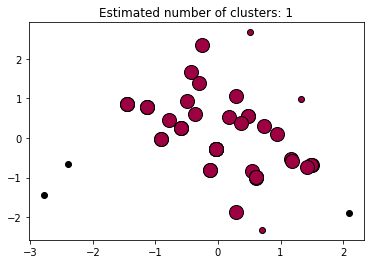

In [5]:
db = DBSCAN(eps=0.92, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# print(labels)
# print(core_samples_mask)

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))

unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()